ZOMATO EDA AND AMALYSIS

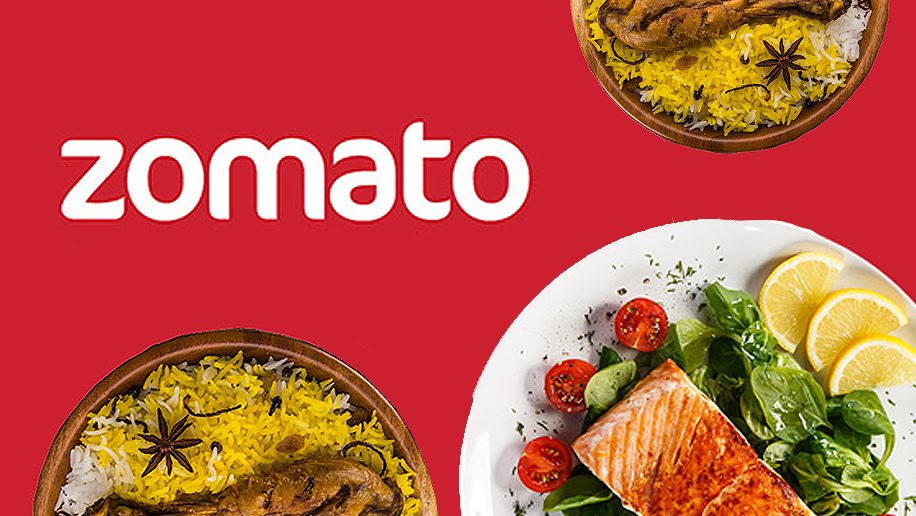

IMPORTING IMPORTANT LIBRARIES


In [129]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [130]:
df=pd.read_csv('zomato.csv',encoding='latin-1')

In [131]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [132]:
# droping un wanted columns 
df.drop(labels=['Restaurant Name'],axis=1, inplace=True)
df.drop(labels=['City'],axis=1, inplace=True)
df.drop(labels=['Address'],axis=1, inplace=True)
df.drop(labels=['Locality'],axis=1, inplace=True)
df.drop(labels=['Locality Verbose'],axis=1, inplace=True)
df.drop(labels=['Cuisines'],axis=1, inplace=True)
df.drop(labels=['Currency'],axis=1, inplace=True)
df.drop(labels=['Has Table booking'],axis=1, inplace=True)
df.drop(labels=['Has Online delivery'],axis=1, inplace=True)
df.drop(labels=['Is delivering now'],axis=1, inplace=True)
df.drop(labels=['Switch to order menu'],axis=1, inplace=True)
df.drop(labels=['Rating color'],axis=1, inplace=True)




In [133]:
##knowing columns
df.columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating',
       'Rating text', 'Votes'],
      dtype='object')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Country Code          9551 non-null   int64  
 2   Longitude             9551 non-null   float64
 3   Latitude              9551 non-null   float64
 4   Average Cost for two  9551 non-null   int64  
 5   Price range           9551 non-null   int64  
 6   Aggregate rating      9551 non-null   float64
 7   Rating text           9551 non-null   object 
 8   Votes                 9551 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 671.7+ KB


In [135]:
df.isnull().sum()

Restaurant ID           0
Country Code            0
Longitude               0
Latitude                0
Average Cost for two    0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
dtype: int64

In [136]:
df.duplicated().sum()

0

In [137]:
#segregating numerical and categorical columns 
categorical_columns=df.columns[df.dtypes=='O']
numerical_columns=df.columns[df.dtypes!='O']
print('CATEGORICAL_COLUMNS:', categorical_columns)
print('NUMERICAL_COLUMNS:',numerical_columns)

CATEGORICAL_COLUMNS: Index(['Rating text'], dtype='object')
NUMERICAL_COLUMNS: Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


In [138]:
df[categorical_columns].describe()


,Rating text
count,9551
unique,6
top,Average
freq,3737


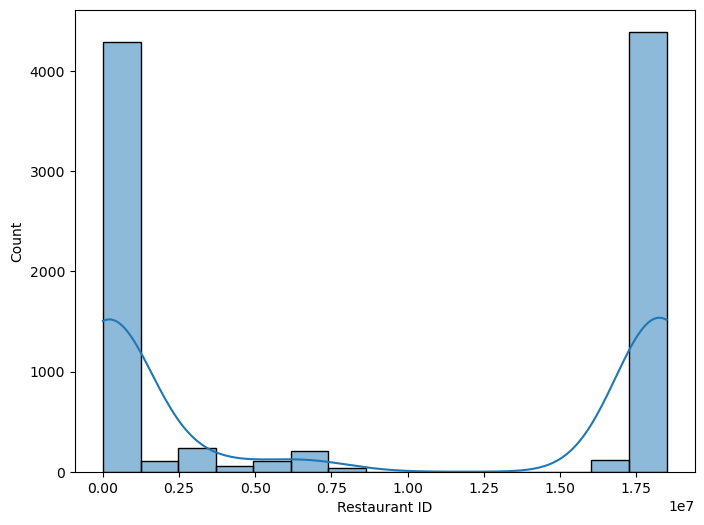

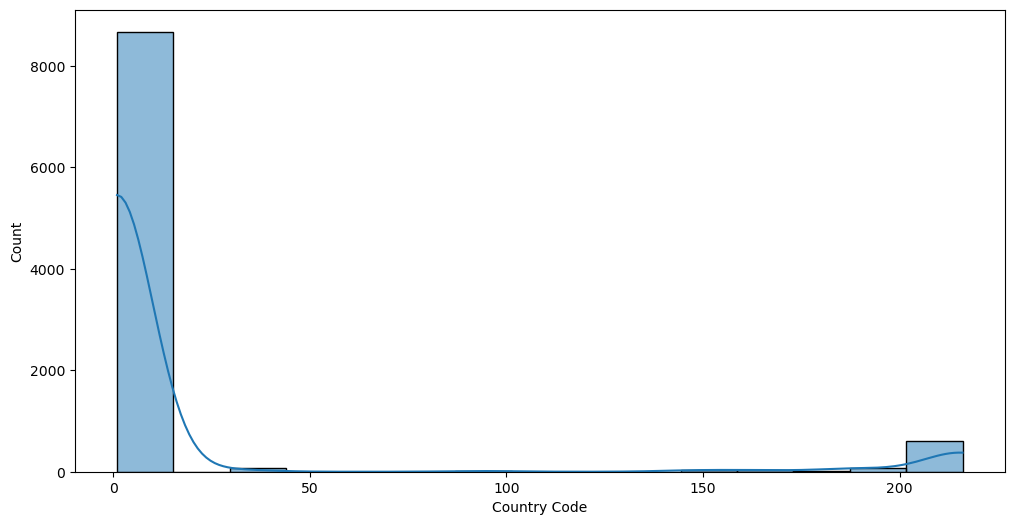

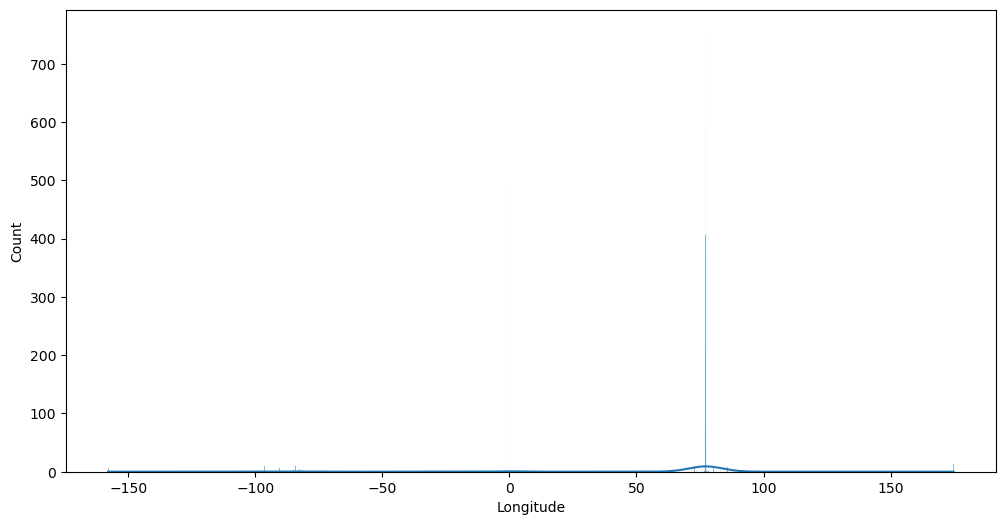

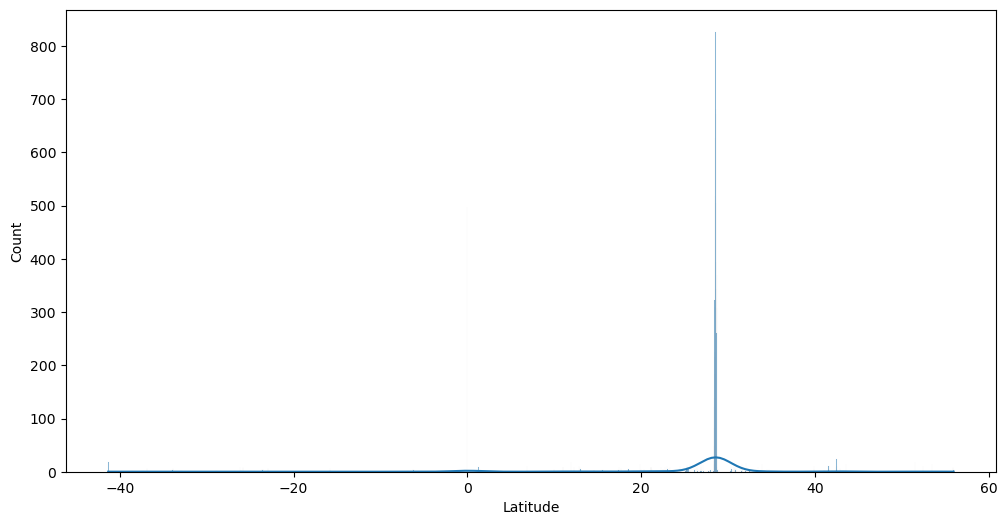

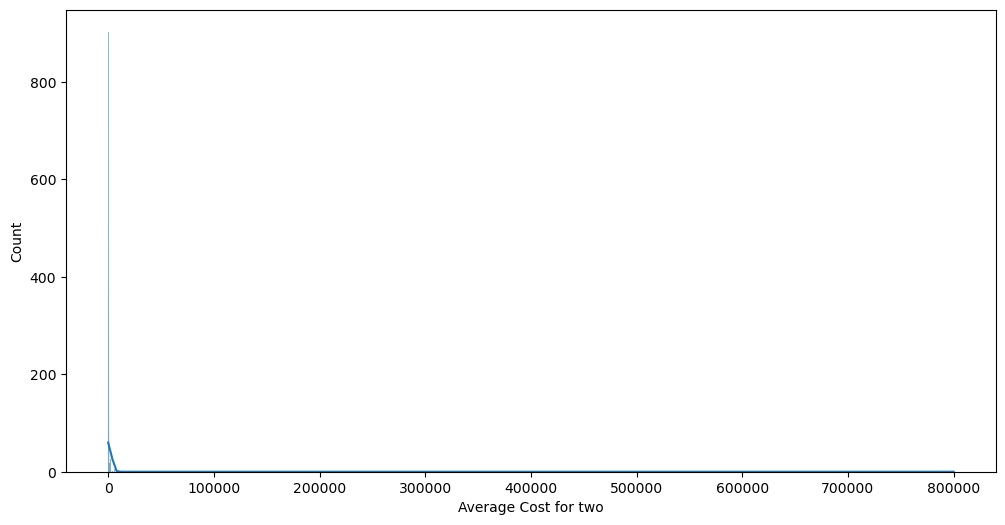

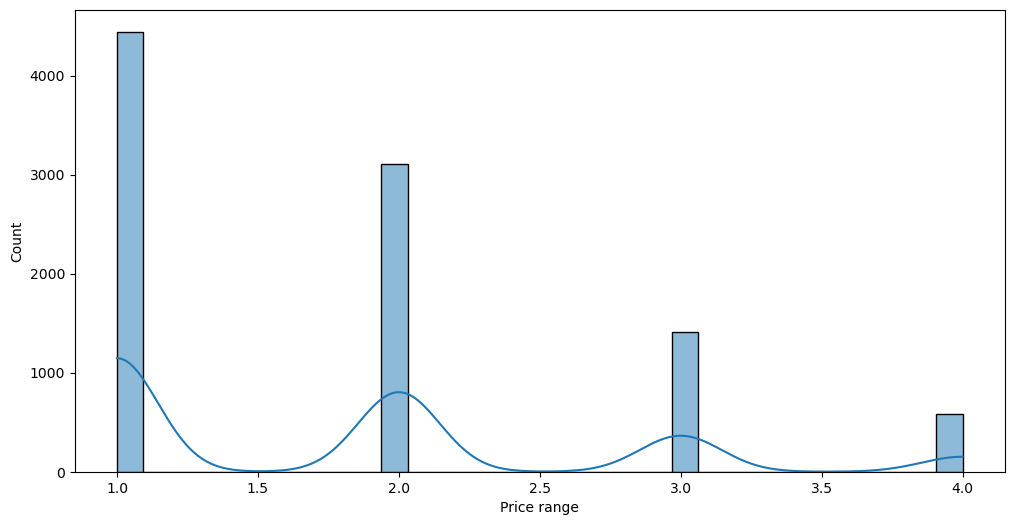

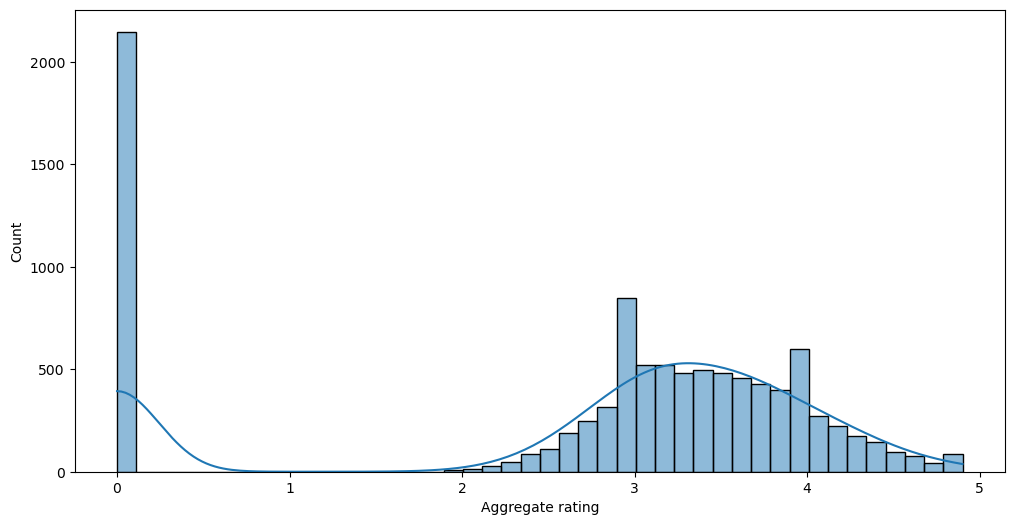

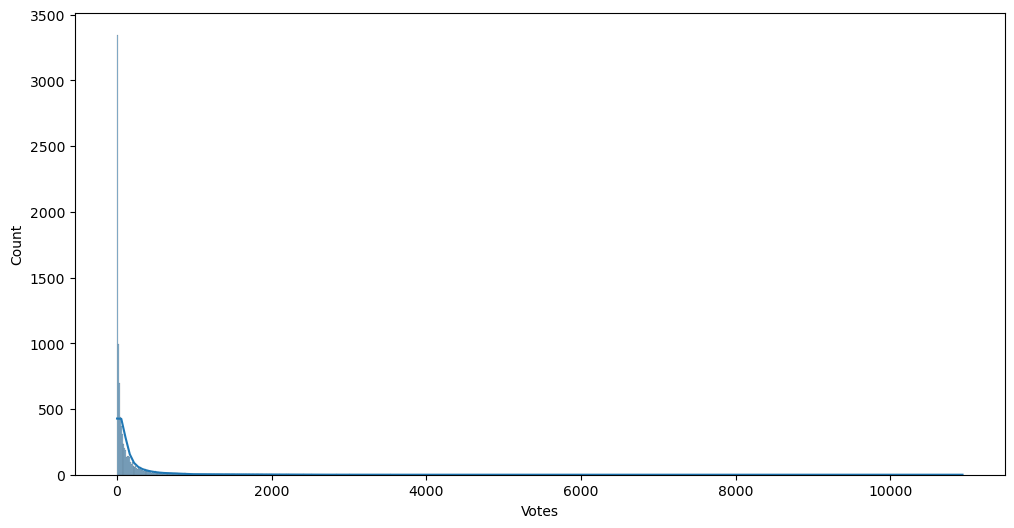

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [140]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

<Axes: >

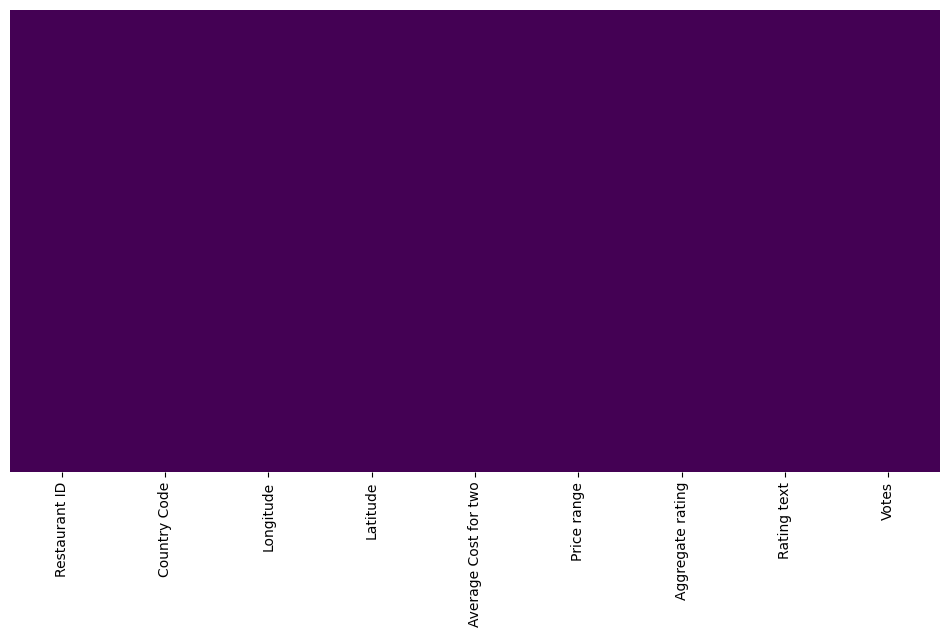

In [141]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)
sns.heatmap(df.isnull(), yticklabels =False, cbar=False, cmap= 'viridis')


In [142]:
df_country=pd.read_excel("C:\\Users\\ACER\\Downloads\\Country-Code.xlsx")


In [143]:
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


LETUS MERGE DF, DFCOLUMNS WITH THE COUNTRY CODE PRESENT ON BOTH THE TABLE

In [144]:
final_df = df.merge(df_country, on='Country Code', how='left')
final_df.head(2)



,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Country
0,6317637,162,121.027535,14.565443,1100,3,4.8,Excellent,314,Phillipines
1,6304287,162,121.014101,14.553708,1200,3,4.5,Excellent,591,Phillipines


In [145]:
final_df.isnull().sum()

Restaurant ID           0
Country Code            0
Longitude               0
Latitude                0
Average Cost for two    0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [146]:
final_df.dtypes

Restaurant ID             int64
Country Code              int64
Longitude               float64
Latitude                float64
Average Cost for two      int64
Price range               int64
Aggregate rating        float64
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [147]:
print('here are the countries using Zomato')
for i in pd.unique (final_df.Country):
    print(i)
print(f"this are the countries in number:",len(pd.unique(final_df.Country)))


here are the countries using Zomato
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey
this are the countries in number: 15


In [148]:
final_df.columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating',
       'Rating text', 'Votes', 'Country'],
      dtype='object')

In [149]:
final_df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [150]:
#maximum transaction happend in india are 8652

In [151]:
final_df.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [152]:
country_name = final_df.Country.value_counts().index
country_name 

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

plotting

In [154]:
df.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes
0,6317637,162,121.027535,14.565443,1100,3,4.8,Excellent,314
1,6304287,162,121.014101,14.553708,1200,3,4.5,Excellent,591
2,6300002,162,121.056831,14.581404,4000,4,4.4,Very Good,270
3,6318506,162,121.056475,14.585318,1500,4,4.9,Excellent,365
4,6314302,162,121.057508,14.584450,1500,4,4.8,Excellent,229


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


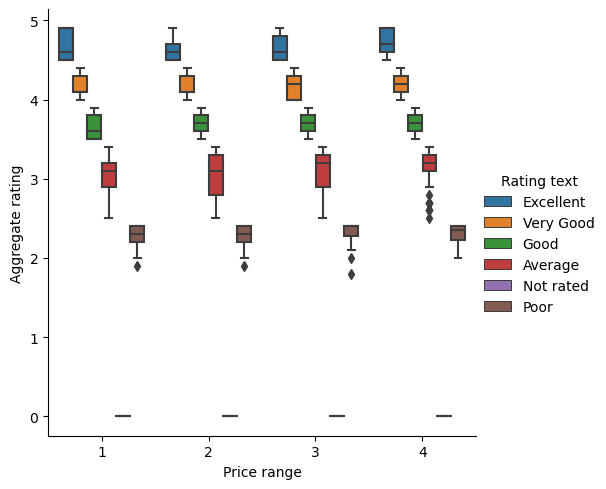

In [155]:
#price range and aggregate rating according to currency 
sns.catplot(data=df, x='Price range', y='Aggregate rating',hue='Rating text', kind='box')

In [156]:
final_df.columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating',
       'Rating text', 'Votes', 'Country'],
      dtype='object')

In [157]:
\

SyntaxError: incomplete input (3477860531.py, line 1)

In [ ]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [ ]:
df['Currency'].value_counts()

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(  )                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

Is delivering now
No     9517
Yes      34
Name: count, dtype: int64

Switch to order menu
No    9551
Name: count, dtype: int64

Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64

In [ ]:
df['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [158]:
final_df.to_csv('final_merged_data1.csv', index=False)


In [159]:
final_df.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Rating text,Votes,Country
0,6317637,162,121.027535,14.565443,1100,3,4.8,Excellent,314,Phillipines
1,6304287,162,121.014101,14.553708,1200,3,4.5,Excellent,591,Phillipines
2,6300002,162,121.056831,14.581404,4000,4,4.4,Very Good,270,Phillipines
3,6318506,162,121.056475,14.585318,1500,4,4.9,Excellent,365,Phillipines
4,6314302,162,121.057508,14.584450,1500,4,4.8,Excellent,229,Phillipines
